In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.datasets import _california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [5]:
# Load the California housing dataset
data=_california_housing.fetch_california_housing(as_frame=True)
df=pd.DataFrame(data=data.frame,columns=data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
X=df[['MedInc','AveRooms','HouseAge']]
y=data.target
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
x_test=scaler.transform(x_test)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(x_test)
model


LinearRegression()

In [7]:
model.coef_


array([ 0.84692393, -0.0672018 ,  0.21217216])

In [8]:
model.intercept_


2.071946937378876

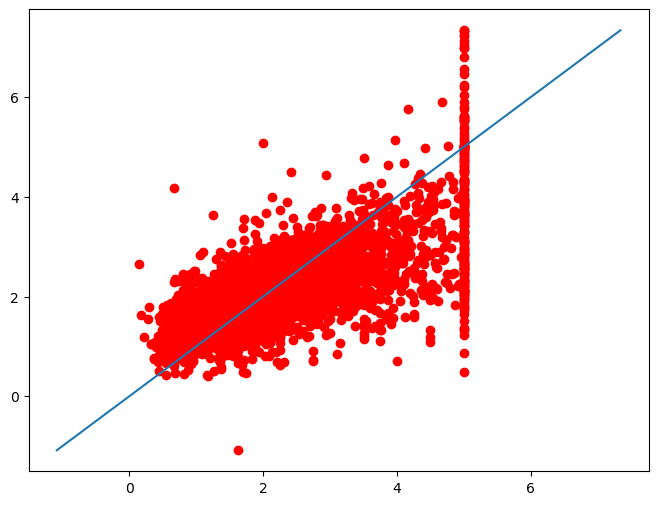

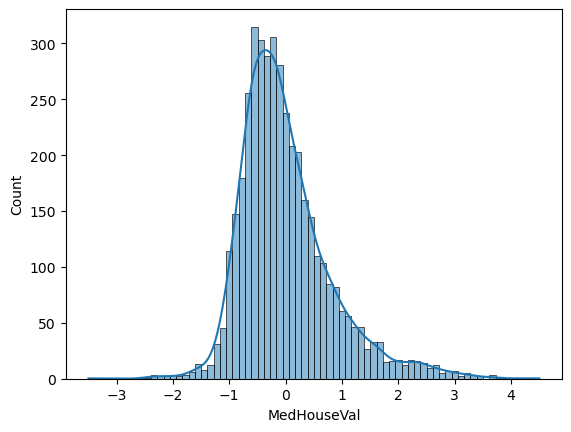

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,color='red')
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val])
plt.show()
sns.histplot(y_test-y_pred,kde=True)
plt.show()

In [10]:
print("----Linear Regression Model Coefficients-----:")
mse=mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:",mse)
print("R^2 Score:", r2)



----Linear Regression Model Coefficients-----:
Mean Squared Error: 0.6589108649336336
R^2 Score: 0.49717158850807075


In [11]:
print("Mean Squared Error:",mse)
print("R^2 Score:", r2)



Mean Squared Error: 0.6589108649336336
R^2 Score: 0.49717158850807075


In [12]:
ridge_model=Ridge(alpha=0.001,solver='cholesky',max_iter=1000)
ridge_model.fit(X_train,y_train)
y_pred_ridge=ridge_model.predict(x_test)
ridge_model.coef_

array([ 0.84692387, -0.06720178,  0.21217214])

In [13]:
ridge_model.intercept_

2.071946937378876

In [14]:
print("-----------Ridge Regression Model Coefficients------------:")
mse_ridge=mean_squared_error(y_test,y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)   
print("Mean Squared Error:",mse_ridge)
print("R^2 Score:", r2_ridge)


-----------Ridge Regression Model Coefficients------------:
Mean Squared Error: 0.6589108628407906
R^2 Score: 0.4971715901051623


In [15]:
Lasso_model=Lasso(alpha=0.001,max_iter=1000)
Lasso_model.fit(X_train,y_train)
y_pred_lasso=Lasso_model.predict(x_test)


In [16]:
Lasso_model.coef_

array([ 0.84534463, -0.06582722,  0.2112011 ])

In [17]:
Lasso_model.intercept_

2.071946937378876

In [18]:
print("-----------Lasso Regression Model COefficients------------:")
mse_Lasso=mean_squared_error(y_test,y_pred)
r2_Lasso=r2_score(y_test,y_pred)
print("Mean Squared Error:",mse_Lasso)
print("R^2 Score:", r2_Lasso)

-----------Lasso Regression Model COefficients------------:
Mean Squared Error: 0.6589108649336336
R^2 Score: 0.49717158850807075
